In [10]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import argrelextrema

In [11]:
class GoodwinOscillator:

    def __init__ (self, p1=1.0, p2=1.0, p3=1.0, p4=1.0,
                  d1=0.20, d2=0.15, d3=0.10, d4=0.1,
                  Km=1, h=9.5, K=0#'Kc':1}
              ):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.p4 = p4
        self.d1 = d1
        self.d2 = d2
        self.d3 = d3
        self.d4 = d4
        self.Km = Km
        self.h = h
        self.K = K

        self.dimension = 4

    # define coupling term 
    def coupling (self, y0):
        v = y0[3::4]
        n_oscs = v.shape[0]
        F = np.sum(v, axis=0) / n_oscs
        return F

    # define ODE model
    def dynamics (self, y0, t):
        # variables
        f = np.zeros_like(y0)
        x = y0[0::4]
        y = y0[1::4]
        z = y0[2::4]
        v = y0[3::4]

        fx = f[0::4]
        fy = f[1::4]
        fz = f[2::4]  
        fv = f[3::4]  

        F = self.coupling (y0) 

        # ODEs
        fx[:] = self.p1* self.Km**self.h / (self.Km**self.h + z**self.h) - self.d1*x + self.K*(F-v)#pc*(K*F) / (Kc + K*F)
        fy[:] = self.p2*x - self.d2*y
        fz[:] = self.p3*y - self.d3*z
        fv[:] = self.p4*x - self.d4*v

        return f

Text(0.5, 1.0, 'time series, 3 different oscillators, no coupling')

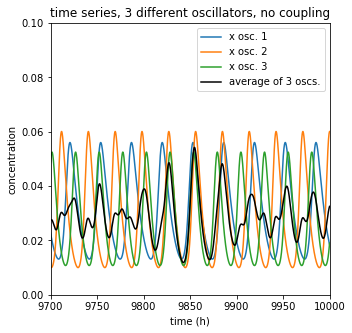

In [12]:
# define number of oscillators, time and initial conditions for integration
n_oscs = 3
dt = 0.01
t = np.arange(0, 10000, dt)
y0 = np.repeat([0.1, 0.1, 0.1, 0.1], n_oscs)

# set d1 values to 0.1, 0.15 and 0.2
d1_values = np.array([0.1, 0.15, 0.2])
obj = GoodwinOscillator(d1 = d1_values)

# solve ODE model
sol = odeint(obj.dynamics, y0, t)
x = sol[:,0::4] 

# plot solution 
# subplot 1: time series
fig1 = plt.figure(figsize=(11,5))

ax1 = fig1.add_subplot(121)
ax1.plot(t, x[:,0], label='x osc. 1')
ax1.plot(t, x[:,1], label='x osc. 2')
ax1.plot(t, x[:,2], label='x osc. 3')
ax1.plot(t, (x[:,0] + x[:,1] + x[:,2])/n_oscs, label='average of 3 oscs.', c='k')
ax1.set_xlim([9700, 10000]); ax1.set_ylim([0, 0.1])
ax1.legend()
ax1.set_xlabel('time (h)'); ax1.set_ylabel('concentration')
ax1.set_title('time series, 3 different oscillators, no coupling')


(1000000, 12)
(1000000, 3)
[[0.1        0.1        0.1       ]
 [0.10979021 0.10979021 0.10979021]
 [0.11956085 0.11956085 0.11956085]
 ...
 [0.0188567  0.0188567  0.0188567 ]
 [0.01889987 0.01889987 0.01889987]
 [0.01894319 0.01894319 0.01894319]]


Text(0.5, 1.0, 'time series, 3 coupled oscs. K=0.5')

/home/mlhm/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/mlhm/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


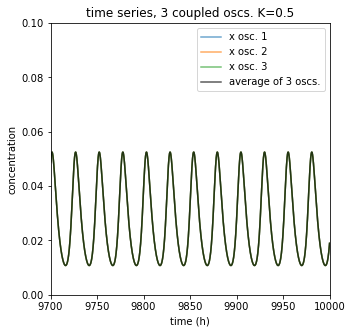

In [18]:
# change coupling strength
obj = GoodwinOscillator(K = 0.5)

# solve ODE model
sol = odeint(obj.dynamics, y0, t)
x = sol[:,0::4] 

# plot solution 
# subplot 1: time series
fig1 = plt.figure(figsize=(11,5))

ax1 = fig1.add_subplot(121)
ax1.plot(t, x[:,0], label='x osc. 1',alpha=0.65)
ax1.plot(t, x[:,1], label='x osc. 2',alpha=0.65)
ax1.plot(t, x[:,2], label='x osc. 3',alpha=0.65)
ax1.plot(t, (x[:,0] + x[:,1] + x[:,2])/n_oscs, label='average of 3 oscs.', c='k', alpha=0.65)
ax1.set_xlim([9700, 10000]); ax1.set_ylim([0, 0.1])
ax1.legend()
ax1.set_xlabel('time (h)'); ax1.set_ylabel('concentration')
ax1.set_title('time series, 3 coupled oscs. K={}'.format(obj.K))